# Text classificaton of movie reviews from IMDB website

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [10]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

### Each review is converted into sequence of Integers where each word is represented by a value corresponding to it in the dictionary

In [9]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [13]:
print(train_labels[0])

1


### Let us convert the length of all reviews to a constant length so that we can feed them to a neural network

In [15]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=0,
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=0,
                                                       padding='post',
                                                       maxlen=256)

In [18]:
len(train_data[0]), len(train_data[1]), len(train_data[2])

(256, 256, 256)

In [19]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### Building the model

In [20]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

### Let us create a validation set to let the model eveluate on the data it has not seen before

In [22]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### Training the model

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
15000/15000 [==============================] - 2s 153us/sample - loss: 0.6922 - acc: 0.5107 - val_loss: 0.6906 - val_acc: 0.4947
Epoch 2/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.6868 - acc: 0.5665 - val_loss: 0.6836 - val_acc: 0.5806
Epoch 3/40
15000/15000 [==============================] - 1s 64us/sample - loss: 0.6763 - acc: 0.6325 - val_loss: 0.6710 - val_acc: 0.6666
Epoch 4/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.6587 - acc: 0.6834 - val_loss: 0.6513 - val_acc: 0.7277
Epoch 5/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.6332 - acc: 0.7472 - val_loss: 0.6248 - val_acc: 0.7564
Epoch 6/40
15000/15000 [==============================] - 1s 68us/sample - loss: 0.5998 - acc: 0.7923 - val_loss: 0.5921 - val_acc: 0.7719
Epoch 7/40
15000/15000 [==============================] - 1s 64us/s

### Let us check the Accuracy

In [24]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 41us/sample - loss: 0.3340 - acc: 0.8702
[0.3339609553909302, 0.87024]


#### Accuracy is 87% for this model

### Let us see accuracy and loss over iterations in the graph

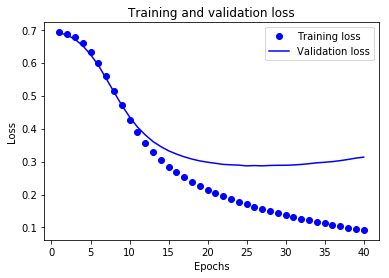

In [27]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

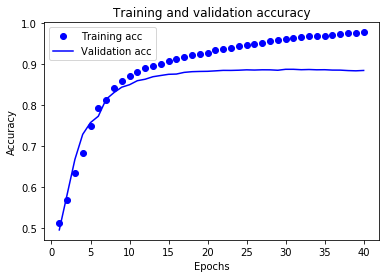

In [26]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()